In [ ]:
import pandas as pd
import math
import numpy as np

# 25/11/2025

In [34]:
# Công thức Bayse cho 3 nhóm , có xác suất thành công
def xac_suat_bayse(a, b, c, a1, b1, c1 , nhom = 'Nhom A'):
    Nhom = {
        'Nhom A' : a/100,
        'Nhom B' : b/100,
        'Nhom C' : c/100,
    }
    Thanhcong = {
        'Nhom A' : a1/100,
        'Nhom B' : b1/100,
        'Nhom C' : c1/100,
    }
    tp = Nhom['Nhom A']* Thanhcong['Nhom A'] + Nhom['Nhom B']* Thanhcong['Nhom B'] + Nhom['Nhom C']* Thanhcong['Nhom C']

    bayse = (Nhom[nhom] * Thanhcong[nhom]) / tp
    print(f"Xac suat bayse: {bayse:.2f}")

In [ ]:
a,b,c = map(int, input("Nhap xac suat cua 3 nhom cach nhau dau cach: ").split())
a1, b1, c1 = map(int, input("Nhap xac suat thanh cong cua 3 nhom cach nhau dau cach: ").split())
nhom = input('Nhap nhom muon tim xac suat')
xac_suat_bayse(a, b, c, a1, b1, c1, nhom )

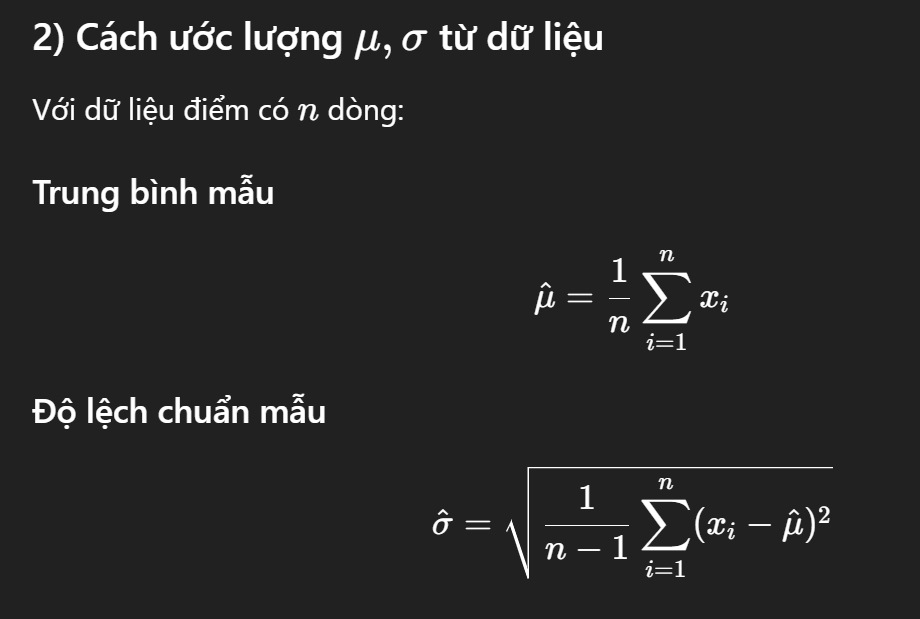

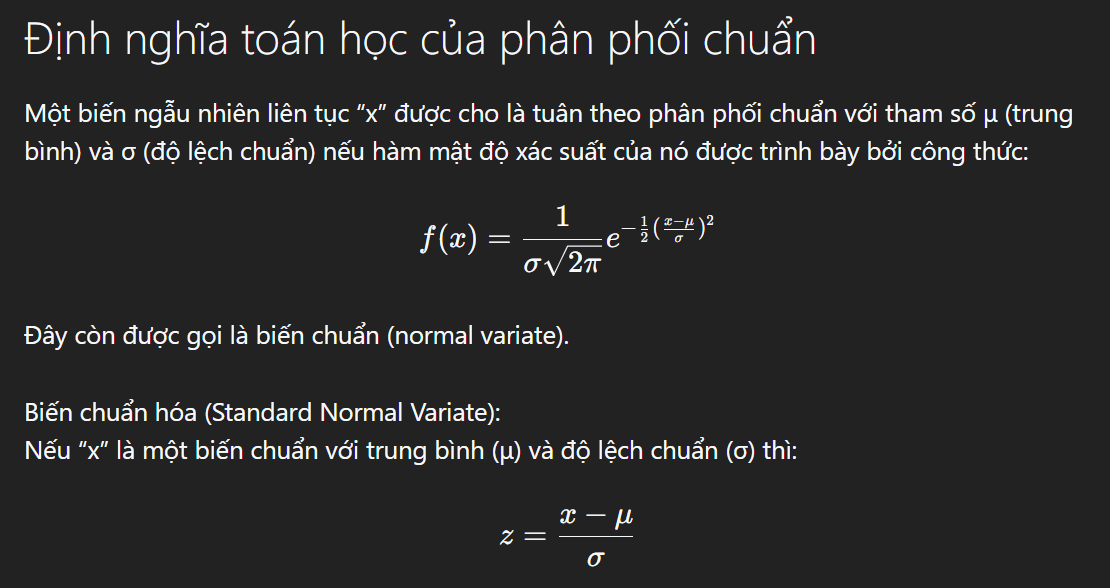

# Cách làm bài toán :
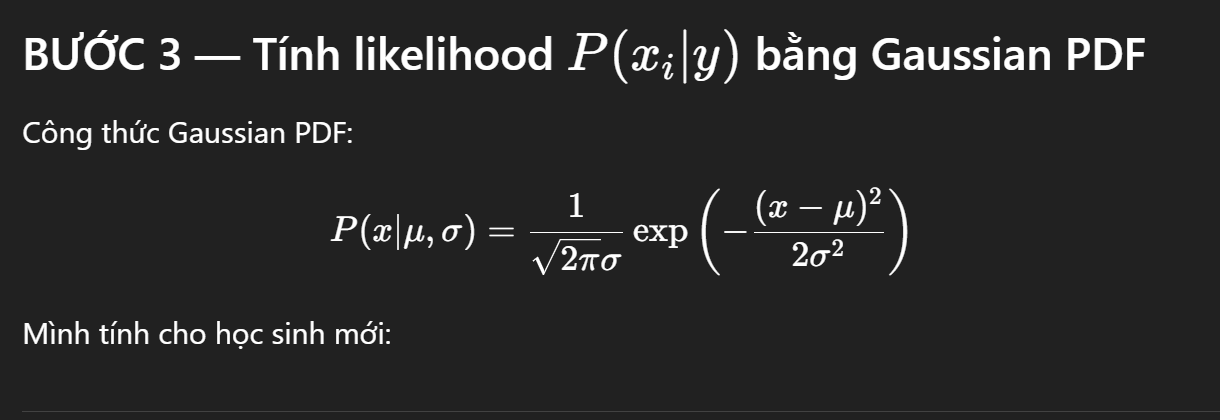
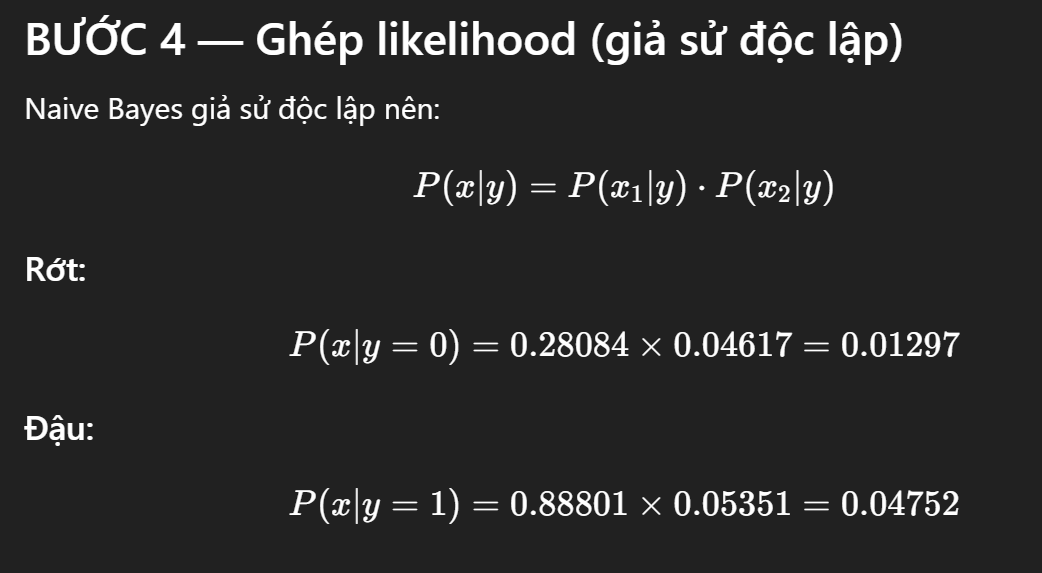
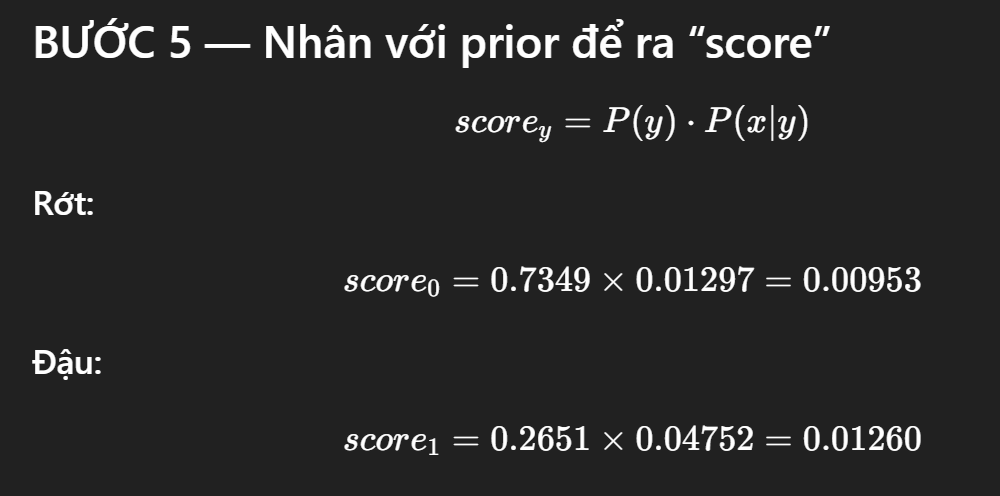
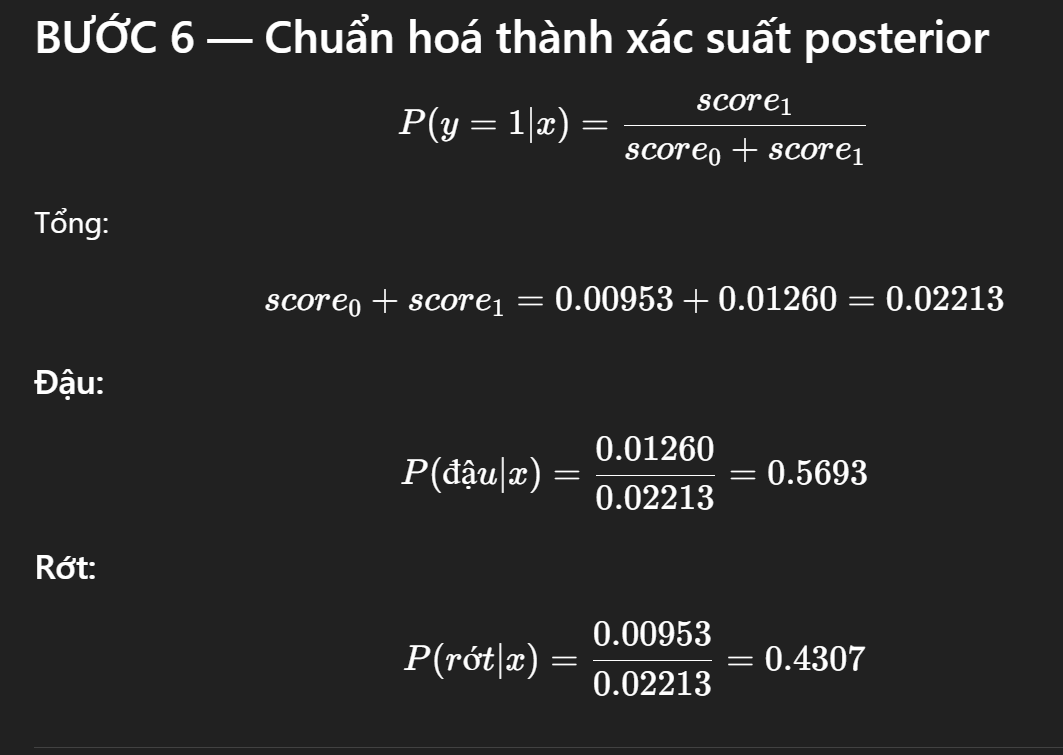

In [36]:
#với mẫu lengh = 5.5 và width = 3.0, tính xác suất p(Class 1/lenght=5.5,width=3.0) sử dụng Gaussian Naive Bayes
def gaussian_naive_bayes(mean1, mean2, var1, var2, prior ) :
    import math
    def gaussian_prob(x, mean, var):
        exponent = math.exp(-((x - mean) ** 2) / (2 * var))
        return (1 / math.sqrt(2 * math.pi * var)) * exponent

    lenght = 5.5
    width = 3.0

    prob_lenght = gaussian_prob(lenght, mean1, var1)
    prob_width = gaussian_prob(width, mean2, var2)

    posterior = prob_lenght * prob_width * prior
    print(f"Xac suat Gaussian Naive Bayes: {posterior:.4f}")

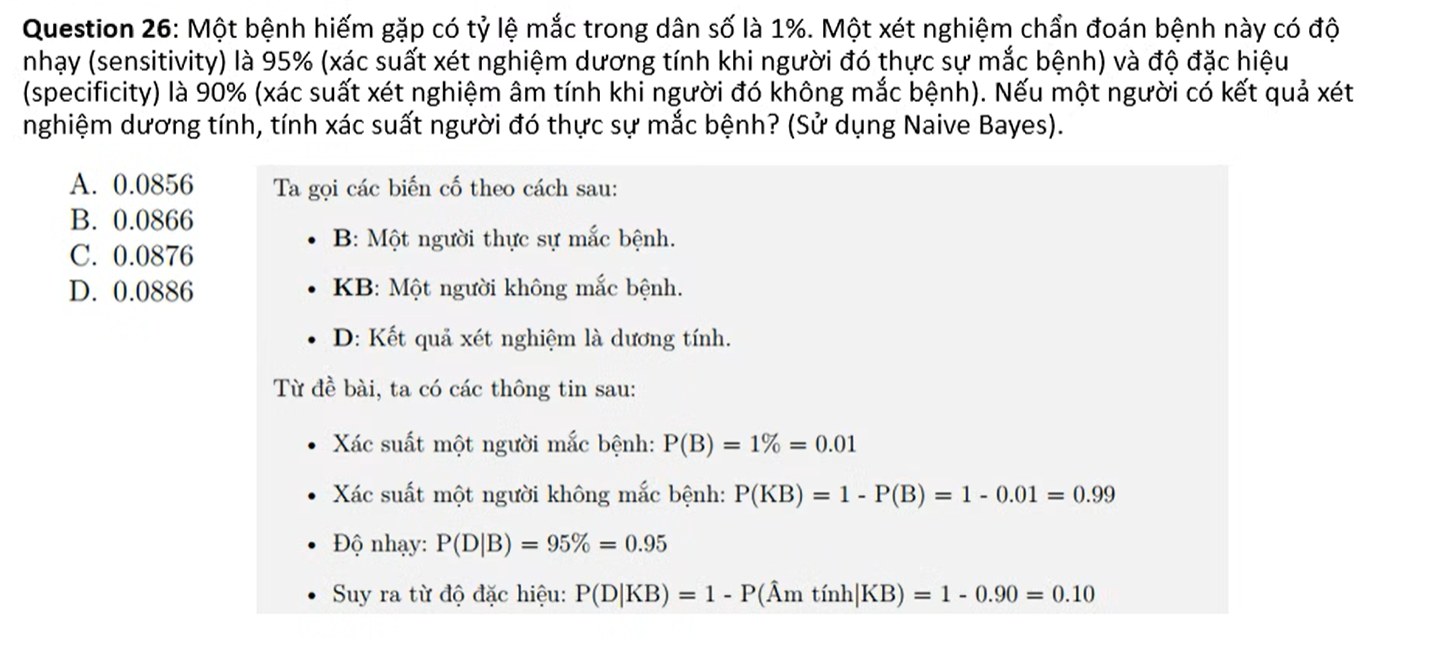

In [37]:
tp = 0.95*0.01 + 0.10*0.99
prior = (0.95*0.01) / tp
print(f"Xac suat prior: {prior:.4f}")

Xac suat prior: 0.0876


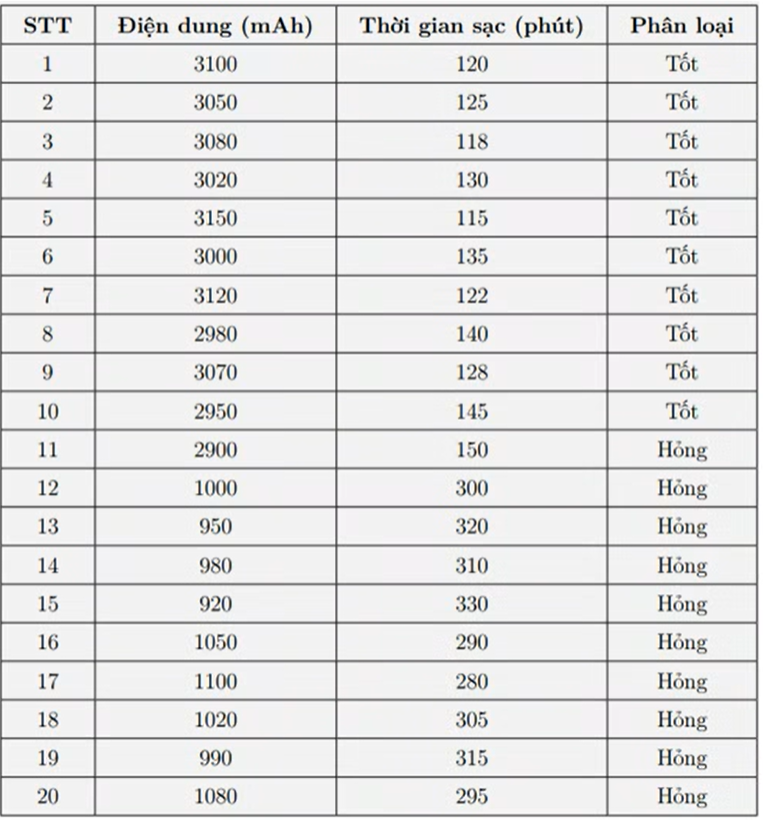

In [61]:


df = pd.read_csv("pin_data.csv")

# 1) tách 2 lớp
df_t = df[df['Phân loại'] == 'Tốt']
df_h = df[df['Phân loại'] == 'Hỏng']

# 2) thống kê cho lớp Tốt
u_t_time = df_t['Thời gian sạc (phút)'].mean()
var_t_time = df_t['Thời gian sạc (phút)'].var()

u_t_cap = df_t['Điện dung (mAh)'].mean()
var_t_cap = df_t['Điện dung (mAh)'].var()

# 3) thống kê cho lớp Hỏng
u_h_time = df_h['Thời gian sạc (phút)'].mean()
var_h_time = df_h['Thời gian sạc (phút)'].var()

u_h_cap = df_h['Điện dung (mAh)'].mean()
var_h_cap = df_h['Điện dung (mAh)'].var()

# 4) prior
P_tot = len(df_t)/len(df)
P_hong = len(df_h)/len(df)

# 5) gaussian pdf
def gaussian_prob(x, mean, var):
    exponent = math.exp(-((x - mean) ** 2) / (2 * var))
    return (1 / math.sqrt(2 * math.pi * var)) * exponent

# 6) pin cần dự đoán
x_time = 330
x_cap  = 920
# 7) likelihood từng lớp
p_time_tot = gaussian_prob(x_time, u_t_time, var_t_time)
p_cap_tot  = gaussian_prob(x_cap,  u_t_cap,  var_t_cap)
p_x_tot = p_time_tot * p_cap_tot

p_time_hong = gaussian_prob(x_time, u_h_time, var_h_time)
p_cap_hong  = gaussian_prob(x_cap,  u_h_cap,  var_h_cap)
p_x_hong = p_time_hong * p_cap_hong

# 8) score = likelihood * prior
score_tot = p_x_tot * P_tot
score_hong = p_x_hong * P_hong

# 9) posterior
P_tot_given_x = score_tot / (score_tot + score_hong)
P_hong_given_x = score_hong / (score_tot + score_hong)

print("P(Tốt|x) =", P_tot_given_x)
print("P(Hỏng|x) =", P_hong_given_x)

print("=> Kết luận:", "TỐT" if P_tot_given_x > P_hong_given_x else "HỎNG")


P(Tốt|x) = 0.0
P(Hỏng|x) = 1.0
=> Kết luận: HỎNG


In [59]:
import pandas as pd
import math

# ======================
# 1. Hàm đọc dữ liệu
# ======================
def create_training_data(path="/mnt/data/pin_data.csv"):
    df = pd.read_csv(path)
    X = df[["Điện dung (mAh)", "Thời gian sạc (phút)"]].values
    y = df["Phân loại"].values
    return X, y


# ======================
# 2. Xác suất tiên nghiệm P(Class)
# ======================
def compute_prior_probabilities(y):
    priors = {}
    total = len(y)
    for label in y:
        priors[label] = priors.get(label, 0) + 1
    for label in priors:
        priors[label] /= total
    return priors


# ======================
# 3. Tính mean/var cho Gaussian
# ======================
def compute_conditional_probabilities(X, y):
    cond = {}
    labels = set(y) # y là mảng nhãn, dùng set để lấy các nhãn duy nhất

    for label in labels:
        X_c = X[y == label]
        mean = X_c.mean(axis=0)
        var = X_c.var(axis=0)
        cond[label] = {"mean": mean, "var": var}
    return cond


# ======================
# 4. Lấy index feature
# ======================
def get_feature_index(feature_list, feature_name):
    return feature_list.index(feature_name)


# ======================
# Gaussian PDF
# ======================
def gaussian_prob(x, mean, var):
    return (1 / math.sqrt(2 * math.pi * var)) * \
           math.exp(-((x - mean) ** 2) / (2 * var))


# ======================
# 5. Train Naive Bayes
# ======================
def train_naive_bayes(path="/mnt/data/pin_data.csv"):
    X, y = create_training_data(path)
    priors = compute_prior_probabilities(y)
    cond = compute_conditional_probabilities(X, y)

    model = {
        "priors": priors,
        "cond": cond
    }
    return model


# ======================
# 6. Predict 
# ======================
def predict_pin(model, x_new):
    priors = model["priors"]
    cond = model["cond"]

    scores = {}

    for label in priors:
        score = priors[label]
        mean = cond[label]["mean"]
        var  = cond[label]["var"]

        for j in range(len(x_new)):
            score *= gaussian_prob(x_new[j], mean[j], var[j])

        scores[label] = score

    # ✅ normalize thành posterior
    total_score = sum(scores.values())
    posteriors = {label: scores[label]/total_score for label in scores}

    pred = max(posteriors, key=posteriors.get)
    return pred, posteriors


In [70]:
model = train_naive_bayes("pin_data.csv")

# Ví dụ pin mới: 3100 mAh, 120 phút
x_new = [2940, 150]

pred, probs = predict_pin(model, x_new)

print("Pin mới:", x_new)
print("Dự đoán:", pred)
print("Posterior:", probs)

Pin mới: [2940, 150]
Dự đoán: Tốt
Posterior: {'Tốt': 0.9997089162058106, 'Hỏng': 0.0002910837941894497}


In [ ]:
def test_accuracy(model, path="pin_data.csv"):
    df = pd.read_csv(path)

    X = df[["Điện dung (mAh)", "Thời gian sạc (phút)"]].values
    y_true = df["Phân loại"].values

    correct = 0
    total = len(df)

    for i in range(total):
        x_new = X[i]
        pred, _ = predict_pin(model, x_new)

        if pred == y_true[i]:
            correct += 1
            
    accuracy = correct / total
    return accuracy


In [ ]:
model = train_naive_bayes("pin_data.csv")
acc = test_accuracy(model)
print("Độ chính xác của mô hình:", acc)


Độ chính xác của mô hình: 0.95
